In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [6]:
df['job_skills']=df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [9]:
type(df['job_skills'][1])

list

In [10]:
df_job_skills_count=df.copy()

In [12]:
df_job_skills_count['job_skills']=df_job_skills_count['job_skills'].explode('job_skills')

In [14]:
df_job_skills_count['job_skills'].value_counts()

job_skills
sql         79944
python      79561
aws         29950
r           27474
azure       27151
            ...  
linode          3
shogun          2
dingtalk        1
msaccess        1
ember.js        1
Name: count, Length: 243, dtype: int64

In [19]:
df_skill_count_no=df_job_skills_count.groupby(['job_skills', 'job_title_short']).size().copy()

In [26]:
df_skill_final=df_skill_count_no.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False).copy()

In [27]:
df_skill_final

,job_skills,job_title_short,skill_count
1758,sql,Data Analyst,19909
1426,python,Data Analyst,19904
1759,sql,Data Engineer,18968
1427,python,Data Engineer,18806
1428,python,Data Scientist,17558
...,...,...,...
262,clickup,Senior Data Engineer,1
1811,suse,Business Analyst,1
1815,suse,Machine Learning Engineer,1
1816,suse,Senior Data Analyst,1


In [28]:
df_skill_final['job_title_short']

1758                 Data Analyst
1426                 Data Analyst
1759                Data Engineer
1427                Data Engineer
1428               Data Scientist
                  ...            
262          Senior Data Engineer
1811             Business Analyst
1815    Machine Learning Engineer
1816          Senior Data Analyst
449              Business Analyst
Name: job_title_short, Length: 2175, dtype: object

In [33]:
job_profile_1='Data Analyst'
job_profile_2='Data Scientist'
job_profile_3='Data Engineer'

In [34]:
df_Data_Analyst=df_skill_final[df_skill_final['job_title_short']==job_profile_1]
df_Data_Scientist=df_skill_final[df_skill_final['job_title_short']==job_profile_2]
df_Data_Engineer=df_skill_final[df_skill_final['job_title_short']==job_profile_3]

In [38]:
df_final_job_table=pd.concat([df_Data_Analyst,df_Data_Scientist,df_Data_Engineer], ignore_index=True)

In [40]:
df_final_job_table

,job_skills,job_title_short,skill_count
0,sql,Data Analyst,19909
1,python,Data Analyst,19904
2,aws,Data Analyst,7557
3,r,Data Analyst,6804
4,azure,Data Analyst,6764
...,...,...,...
696,shogun,Data Engineer,2
697,dingtalk,Data Engineer,1
698,nuxt.js,Data Engineer,1
699,nuix,Data Engineer,1


In [50]:
job_title_array=['Data Analyst', 'Data Scientist', 'Data Engineer']

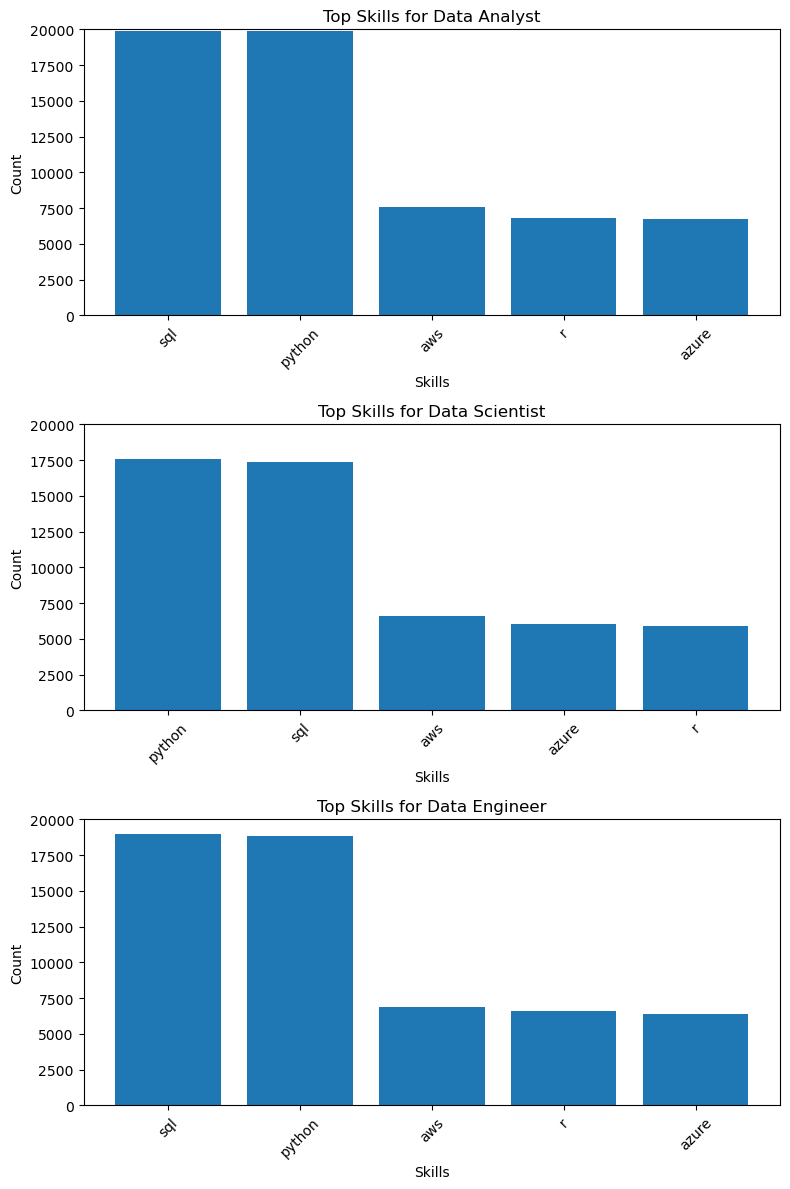

In [67]:
fig, ax=plt.subplots(3,1, figsize=(8, 12))
for (i, job_title) in enumerate(job_title_array):
    
    df_plot=df_final_job_table[df_final_job_table['job_title_short']==job_title].head(5)
    ##df_plot['skill_count'] = pd.to_numeric(df_plot['skill_count'], errors='coerce')
    
    ax[i].bar(df_plot['job_skills'], df_plot['skill_count'])
    ax[i].set_title(f'Top Skills for {job_title}')
    ax[i].set_xlabel('Skills')
    ax[i].set_ylabel('Count')
    ax[i].set_ylim(0,20000)
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
    
   
